# RANSAC Robustness Regression

## Importing the libraries and importing the dataset

In [22]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

dataset = pd.read_csv("T_load_wholeday.csv")
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

## Creating RANSAC regressor and training with dataset

In [23]:
from sklearn.linear_model import RANSACRegressor, LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

# creating regressor object
regressor = RANSACRegressor(base_estimator=LinearRegression(),
                         min_samples=150, max_trials=500,
                         loss='absolute_error', stop_probability =0.95 ,random_state=42,
                         residual_threshold=24)
regressor.fit(X,y)

RANSACRegressor(base_estimator=LinearRegression(), max_trials=500,
                min_samples=150, random_state=42, residual_threshold=24,
                stop_probability=0.95)

## MAE and R2_score

In [24]:

from sklearn.model_selection import cross_val_score
lin_score = cross_val_score(estimator= regressor, X = X, y=y, cv = 10, scoring ='neg_mean_absolute_error')
lin_score = abs(lin_score)
print("Mean Absolute error value for the regression = %3f, \n with standard deviation = %2f" %(lin_score.mean(),lin_score.std()))

from sklearn.metrics import r2_score
y_pred = regressor.predict(X)
r2 = r2_score(y,y_pred)
print("\nThe R^2 score for the regression is = ",r2)

print("Number of datapoints used = ", len(X))

Mean Absolute error value for the regression = 25.667882, 
 with standard deviation = 4.956721

The R^2 score for the regression is =  -0.0451907104072784
Number of datapoints used =  357


## Plotting the results

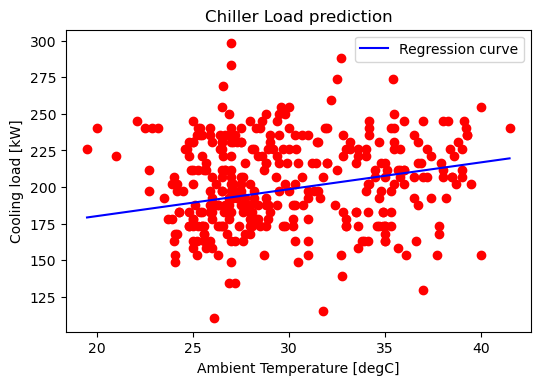

In [25]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.figure(dpi = 100)
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue', label ='Regression curve')
plt.xlabel("Ambient Temperature [degC]")
plt.ylabel("Cooling load [kW]")
plt.title("Chiller Load prediction")
plt.legend()
plt.show()

## The Equation for the above regression 

In [26]:
coef = regressor.estimator_.coef_
intercept = regressor.estimator_.intercept_

print("Equation for this regression is \nCooling_Load = (%3f x Temp) + %3f" %(coef,intercept))

Equation for this regression is 
Cooling_Load = (1.835311 x Temp) + 143.407593


## Ploting the daily load profile

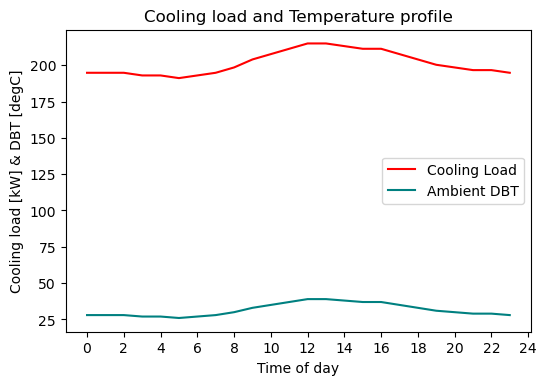

In [27]:
T_amb = {0:28,1:28,2:28,3:27,4:27,5:26,6:27,7:28,8:30,9:33,10:35,11:37,12:39,
         13:39,14:38,15:37,16:37,17:35,18:33,19:31,20:30,21:29,22:29,23:28}
time=[]
temp = []
load = []
for t in T_amb :
  time.append(t)
  temp.append(T_amb[t])
  pred = regressor.predict([[T_amb[t]]])
  load.append(pred)

time = np.array(time)
time.reshape(len(time),1)
plt.figure(dpi = 100)
plt.plot(time,load, color = 'red', label="Cooling Load")
plt.plot(time,temp, color = 'teal', label="Ambient DBT")
plt.xlabel("Time of day")
plt.ylabel("Cooling load [kW] & DBT [degC]")
plt.title("Cooling load and Temperature profile")
plt.locator_params(axis='x', nbins=25)
plt.legend()
plt.show()

In [28]:
print(load)

[array([194.79629594]), array([194.79629594]), array([194.79629594]), array([192.96098513]), array([192.96098513]), array([191.12567431]), array([192.96098513]), array([194.79629594]), array([198.46691758]), array([203.97285003]), array([207.64347167]), array([211.3140933]), array([214.98471494]), array([214.98471494]), array([213.14940412]), array([211.3140933]), array([211.3140933]), array([207.64347167]), array([203.97285003]), array([200.3022284]), array([198.46691758]), array([196.63160676]), array([196.63160676]), array([194.79629594])]


## Power consumed by the AC plant vs cooling load

## -> Decision tree regression 

In [29]:
#### uploading the dataset 

dataset2 = pd.read_csv("total_load_power.csv")
X2 = dataset2.iloc[:,:-1].values
y2 = dataset2.iloc[:,-1].values

#### creating the regressor object from DecsionTreeRegressor class

from sklearn.tree import DecisionTreeRegressor
regressor2 = DecisionTreeRegressor(random_state = 42)
regressor2.fit(X2,y2)

#### Checking the Mean absolute error for the model

from sklearn.model_selection import cross_val_score
score2 = cross_val_score(estimator= regressor2, X=X2, y=y2, scoring="neg_mean_absolute_error",cv=10)
score2 = abs(score2)
print("The mean absolute error for regression is = %3f \nwith standard deviation = %3f"%(score2.mean(), score2.std()))

The mean absolute error for regression is = 16.143742 
with standard deviation = 4.529783


## Power consumption profile using decision tree regression

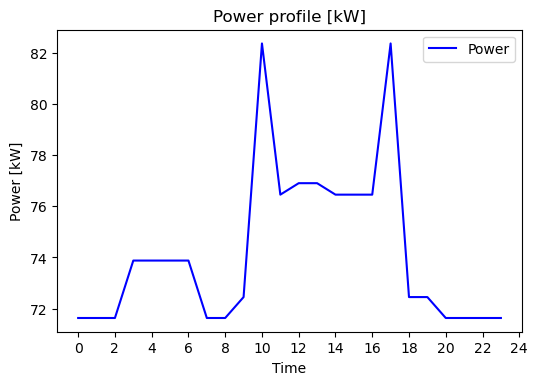

In [30]:
power = regressor2.predict(load)
plt.figure(dpi = 100)
#plt.plot(time,load, color = 'red', label="Cooling Load")
#plt.plot(time,temp, color = 'teal', label="Ambient DBT")
plt.plot(time,power, color = 'blue', label="Power")
plt.xlabel("Time")
plt.ylabel("Power [kW]" )
plt.title("Power profile [kW]")
#plt.title("Cooling load, Power & temperature profile")
plt.locator_params(axis='x', nbins=25)
plt.legend()
plt.show()

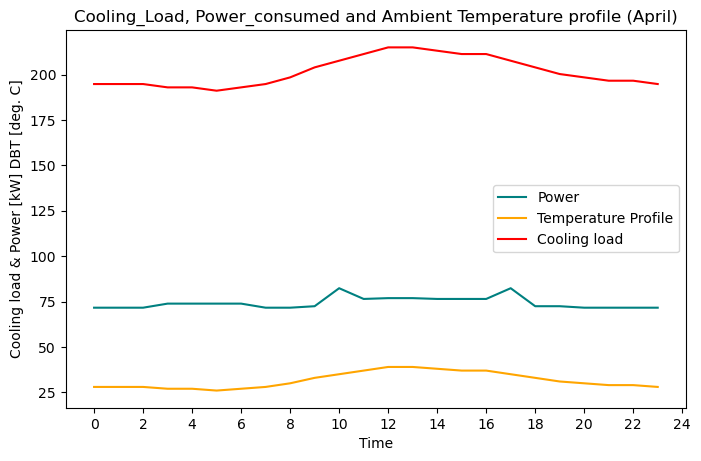

In [40]:
plt.figure(dpi = 100, figsize =[8,5])
plt.plot(time,power, color = 'teal', label="Power")
plt.plot(time, temp, color = 'orange',label ="Temperature Profile" )
plt.plot(time, load, color = 'red', label = "Cooling load")
plt.xlabel("Time")
plt.ylabel("Cooling load & Power [kW] DBT [deg. C]" )
plt.title("Cooling_Load, Power_consumed and Ambient Temperature profile (April)")
plt.locator_params(axis='x', nbins=25)
plt.legend()
plt.show()

## Power consumption profile using Polynomial Linear Regression

In [32]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
data = pd.read_csv('total_kwpt_pcu.csv')
X7 = data.iloc[:,:-1].values
y7 = data.iloc[:,-1].values

In [33]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
feature_matrix = PolynomialFeatures(degree = 2)
X_poly2 = feature_matrix.fit_transform(X7)
# now passing the data 
poly_regressor = LinearRegression()
poly_regressor.fit(X_poly2, y7)


LinearRegression()

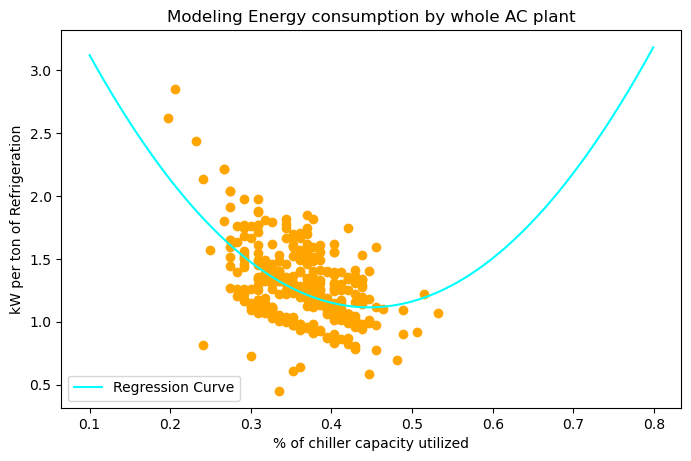

In [34]:
intercpt = poly_regressor.intercept_
coefficient = poly_regressor.coef_

x_ordinate = np.arange(0.1,0.8,0.001)
y_abscissa = intercpt + (coefficient[1]*x_ordinate) + (coefficient[2]* (x_ordinate**2))

plt.figure(dpi = 100 , figsize=[8,5])
plt.scatter(X7,y7, c='orange')
plt.plot(x_ordinate, y_abscissa , c='cyan', label ="Regression Curve")
plt.title('Modeling Energy consumption by whole AC plant')
plt.xlabel('% of chiller capacity utilized')
plt.ylabel('kW per ton of Refrigeration')
plt.legend()
plt.show()

In [35]:
print(intercpt)
print(coefficient)

4.444076494896581
[  0.         -14.89883486  16.67166899]


In [36]:
capacity_utilized =[]
for i in range(0,24):
  capacity = load[i]/560
  capacity_utilized.append(capacity)
capacity_utilized = np.array(capacity_utilized).reshape(-1, 1)
capacity_utilized = feature_matrix.fit_transform(capacity_utilized)

kwpt = poly_regressor.predict(capacity_utilized)

# now converting kwpt to power consumed 

power_profile = []
for j in range(0,24):
  tonn = load[j]/3.516
  consumption = kwpt[j] * tonn
  power_profile.append(consumption)

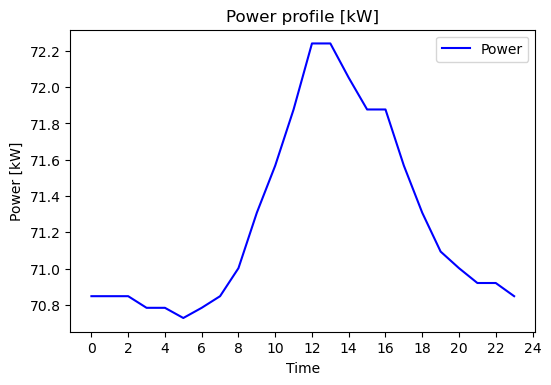

In [37]:
# plotting the 24 hr - power profile 
plt.figure(dpi = 100)
plt.plot(time,power_profile, color = 'blue', label="Power")
plt.xlabel("Time")
plt.ylabel("Power [kW]" )
plt.title("Power profile [kW]")
plt.locator_params(axis='x', nbins=25)
plt.legend()
plt.show()

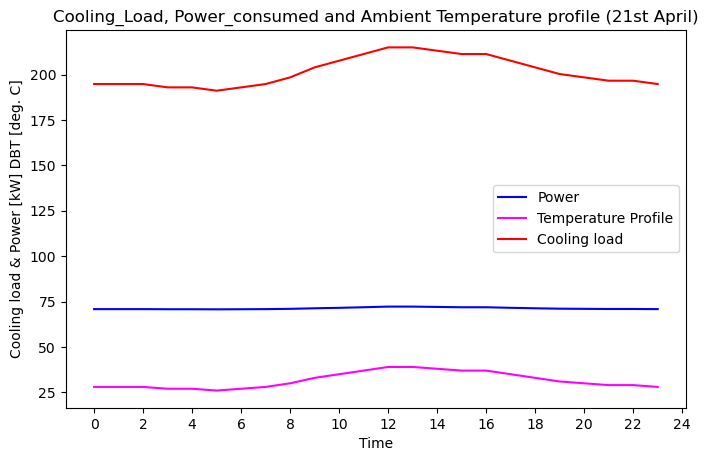

In [38]:
plt.figure(dpi = 100, figsize =[8,5])
plt.plot(time,power_profile, color = 'blue', label="Power")
plt.plot(time, temp, color = 'magenta',label ="Temperature Profile" )
plt.plot(time, load, color = 'red', label = "Cooling load")
plt.xlabel("Time")
plt.ylabel("Cooling load & Power [kW] DBT [deg. C]" )
plt.title("Cooling_Load, Power_consumed and Ambient Temperature profile (21st April)")
plt.locator_params(axis='x', nbins=25)
plt.legend()
plt.show()